In [27]:
%matplotlib inline

# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os 
import statistics
import scipy.stats as sts
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl

import random 
import timeit
import requests
from citipy import citipy
from datetime import datetime
import time

# Import the API key.
from config import weather_api_key


In [5]:
#6.1.4 Generate Random Latitudes and Longitudes##########################################

# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

#The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple. 
#If there are 1,500 latitudes and longitudes, there will be 1,500 tuples of paired latitudes and longitudes, 
#where each latitude and longitude in a tuple can be accessed by the index of 0 and 1, respectively

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

#Now that we have our ordered pairs of latitudes and longitudes in a list, 
#we can iterate through the list of tuples and find the nearest city to those coordinates.

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [ ]:
# 6.2.6 Get the City Weather Data ##################################################################################


In [13]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in the list.
# ****check enumerate
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | airai
Processing Record 3 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | kholm
Processing Record 7 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | brainerd
Processing Record 10 of Set 1 | bhag
Processing Record 11 of Set 1 | saskylakh
Processing Record 12 of Set 1 | samusu
City not found. Skipping...
Processing Record 13 of Set 1 | dikson
Processing Record 14 of Set 1 | chuy
Processing Record 15 of Set 1 | rudnogorsk
Processing Record 16 of Set 1 | faanui
Processing Record 17 of Set 1 | vila velha
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | axim
Processing Record 20 of Set 1 | thompson
Processing Record 21 of Set 1 | broome
Processing Record

Processing Record 44 of Set 4 | komatipoort
Processing Record 45 of Set 4 | chokurdakh
Processing Record 46 of Set 4 | balikpapan
Processing Record 47 of Set 4 | saint anthony
Processing Record 48 of Set 4 | surt
Processing Record 49 of Set 4 | tiznit
Processing Record 50 of Set 4 | mentok
City not found. Skipping...
Processing Record 1 of Set 5 | alexandria
Processing Record 2 of Set 5 | katsuura
Processing Record 3 of Set 5 | pemba
Processing Record 4 of Set 5 | san lorenzo
Processing Record 5 of Set 5 | yamada
Processing Record 6 of Set 5 | carupano
Processing Record 7 of Set 5 | mount darwin
Processing Record 8 of Set 5 | sitka
Processing Record 9 of Set 5 | necochea
Processing Record 10 of Set 5 | mataram
Processing Record 11 of Set 5 | muroto
Processing Record 12 of Set 5 | ryotsu
Processing Record 13 of Set 5 | halalo
City not found. Skipping...
Processing Record 14 of Set 5 | hamilton
Processing Record 15 of Set 5 | santa rosalia
Processing Record 16 of Set 5 | hithadhoo
Proces

Processing Record 35 of Set 8 | lichuan
Processing Record 36 of Set 8 | bulgan
Processing Record 37 of Set 8 | vostok
Processing Record 38 of Set 8 | acajutla
Processing Record 39 of Set 8 | jiroft
City not found. Skipping...
Processing Record 40 of Set 8 | karratha
Processing Record 41 of Set 8 | mantena
Processing Record 42 of Set 8 | saint-joseph
Processing Record 43 of Set 8 | barabai
Processing Record 44 of Set 8 | sisimiut
Processing Record 45 of Set 8 | tilichiki
Processing Record 46 of Set 8 | wonthaggi
Processing Record 47 of Set 8 | marsa matruh
Processing Record 48 of Set 8 | viligili
City not found. Skipping...
Processing Record 49 of Set 8 | puqi
Processing Record 50 of Set 8 | torbay
Processing Record 1 of Set 9 | porbandar
Processing Record 2 of Set 9 | kieta
Processing Record 3 of Set 9 | alofi
Processing Record 4 of Set 9 | mys shmidta
City not found. Skipping...
Processing Record 5 of Set 9 | lebu
Processing Record 6 of Set 9 | praya
Processing Record 7 of Set 9 | por

Processing Record 23 of Set 12 | tianpeng
Processing Record 24 of Set 12 | nogliki
Processing Record 25 of Set 12 | biltine
Processing Record 26 of Set 12 | teguldet
Processing Record 27 of Set 12 | wahiawa
Processing Record 28 of Set 12 | soyo
Processing Record 29 of Set 12 | linchuan
City not found. Skipping...
Processing Record 30 of Set 12 | gizo
Processing Record 31 of Set 12 | narsaq
Processing Record 32 of Set 12 | maceio
Processing Record 33 of Set 12 | severnyy-kospashskiy
Processing Record 34 of Set 12 | evans
Processing Record 35 of Set 12 | lykhivka
Processing Record 36 of Set 12 | garissa
Processing Record 37 of Set 12 | mirnyy
Processing Record 38 of Set 12 | trelleborg
Processing Record 39 of Set 12 | longlac
City not found. Skipping...
Processing Record 40 of Set 12 | kaitangata
Processing Record 41 of Set 12 | mayor pablo lagerenza
Processing Record 42 of Set 12 | youkounkoun
Processing Record 43 of Set 12 | alberton
Processing Record 44 of Set 12 | jieshi
Processing R

In [15]:
len(city_data)

569

In [17]:
#This is a list of dictionaries
type(city_data)

list

In [18]:
#6.2.7 Create a DataFrame of City Weather Data ###########################################################

In [19]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.88,147.33,53.60,93,75,10.29,AU,2020-06-21 22:41:20
1,Airai,-8.93,125.41,58.42,91,79,3.94,TL,2020-06-21 22:43:30
2,Punta Arenas,-53.15,-70.92,35.60,93,75,8.05,CL,2020-06-21 22:42:32
3,Rikitea,-23.12,-134.97,70.75,66,85,16.22,PF,2020-06-21 22:43:31
4,Kholm,59.27,32.85,50.22,79,0,3.80,RU,2020-06-21 22:43:31
5,Ushuaia,-54.80,-68.30,35.60,80,31,5.82,AR,2020-06-21 22:43:31
6,Brainerd,46.36,-94.20,75.20,44,90,13.87,US,2020-06-21 22:40:04
7,Bhag,29.04,67.82,95.00,30,0,2.68,PK,2020-06-21 22:43:31
8,Saskylakh,71.92,114.08,57.22,59,73,9.37,RU,2020-06-21 22:42:44
9,Dikson,73.51,80.55,43.39,79,66,12.73,RU,2020-06-21 22:43:31


In [20]:
#assign a variable to an array of the columns in the order we want them to appear:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [21]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hobart,AU,2020-06-21 22:41:20,-42.88,147.33,53.60,93,75,10.29
1,Airai,TL,2020-06-21 22:43:30,-8.93,125.41,58.42,91,79,3.94
2,Punta Arenas,CL,2020-06-21 22:42:32,-53.15,-70.92,35.60,93,75,8.05
3,Rikitea,PF,2020-06-21 22:43:31,-23.12,-134.97,70.75,66,85,16.22
4,Kholm,RU,2020-06-21 22:43:31,59.27,32.85,50.22,79,0,3.80
...,...,...,...,...,...,...,...,...,...
564,Iwanai,JP,2020-06-21 22:43:57,42.97,140.51,64.76,67,87,5.86
565,Shihezi,CN,2020-06-21 22:39:03,44.30,86.03,57.24,37,0,6.17
566,Smolyaninovo,RU,2020-06-21 22:43:57,43.30,132.47,62.60,100,75,4.47
567,Gamba,GA,2020-06-21 22:43:07,-2.65,10.00,71.58,95,0,5.08


In [22]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

#The last line in the code block will export the DataFrame to a CSV file, with the INDEX label (or column A) header as “City_ID.” 
#If we ever need to export the CSV file to a DataFrame, that header will be present in the DataFrame.

In [23]:
# 6.3.1 Plot Latitude vs. Temperature - Visualizations for STEM students

In [26]:
# Extract relevant fields from the DataFrame for plotting
#These are all series
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [25]:
type(lats)

pandas.core.series.Series

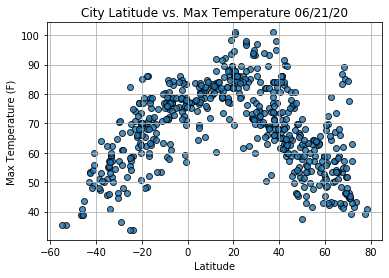

In [28]:
# Build the scatter plot for latitude vs. MAX TEMPERATURE.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

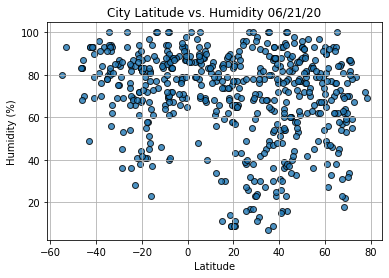

In [29]:
# Build the scatter plots for latitude vs. HUMIDITY.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

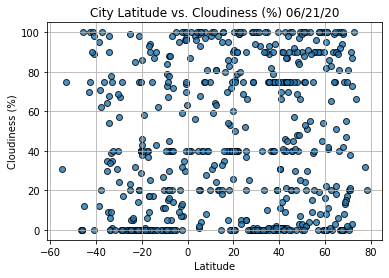

In [30]:
# Build the scatter plots for latitude vs. CLOUDINESS.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

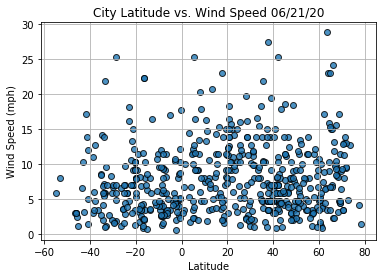

In [32]:
# Build the scatter plots for latitude vs. WIND SPEED.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()